In [2]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/new/data_cardiovascular_risk.csv')

In [4]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-5-7b6d7a1a7ed7>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [6]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


<Axes: xlabel='totChol', ylabel='Density'>

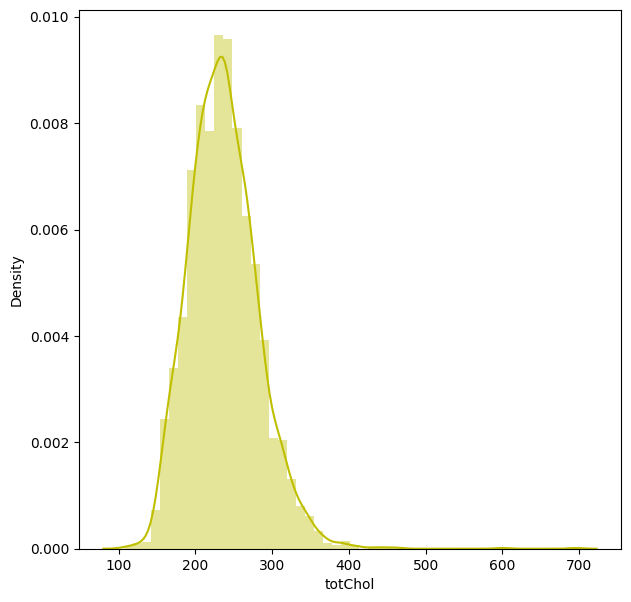

In [10]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['totChol'],color="y")

<Axes: xlabel='sysBP', ylabel='Density'>

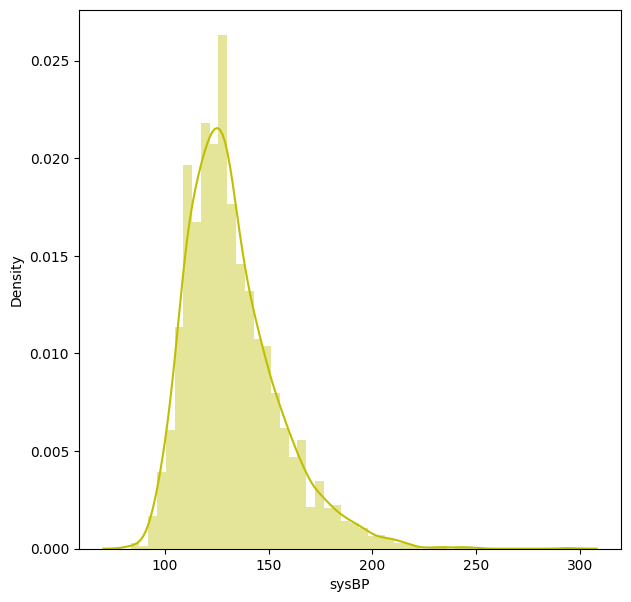

In [11]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['sysBP'],color='y')

In [16]:
dataset.shape

(3390, 17)

In [19]:
dataset.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [22]:
dataset = dataset.dropna()

In [23]:
dataset.shape

(2927, 17)

In [24]:
dataset['education'].value_counts()

,count
education,
1.0,1240
2.0,874
3.0,487
4.0,326


In [25]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [26]:
dataset['diaBP'].describe()

,diaBP
count,2927.000000
mean,82.906218
std,12.078873
min,48.000000
25%,74.500000
50%,82.000000
75%,90.000000
max,142.500000


<Axes: xlabel='diaBP', ylabel='Density'>

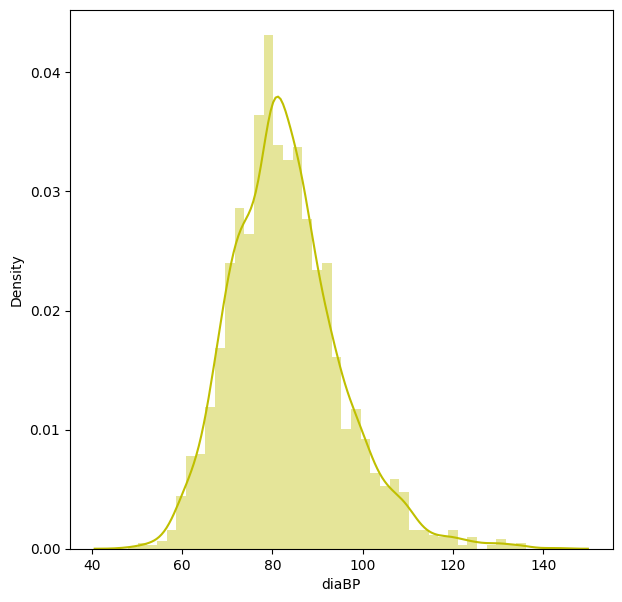

In [29]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['diaBP'],color='y')

<Axes: xlabel='BMI', ylabel='Density'>

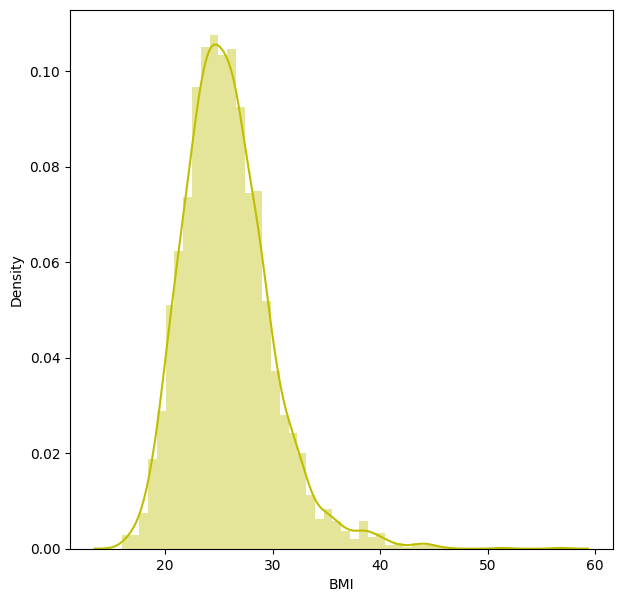

In [30]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['BMI'],color='y')

In [31]:
dataset1 = dataset.copy()

In [32]:
dataset1.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [33]:
dataset1['BMI'] = np.log(dataset['BMI'])

<Axes: xlabel='BMI', ylabel='Density'>

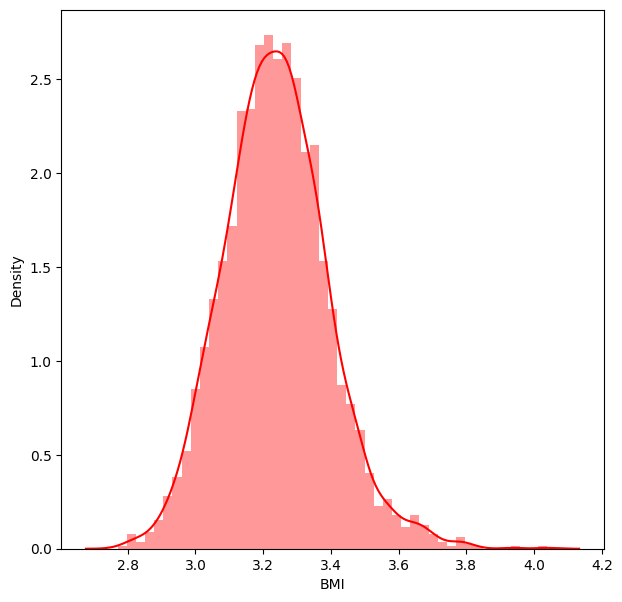

In [34]:
plt.figure(figsize=(7,7))
sns.distplot(dataset1['BMI'],color='r')

In [35]:
dataset.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


<Axes: xlabel='heartRate', ylabel='Density'>

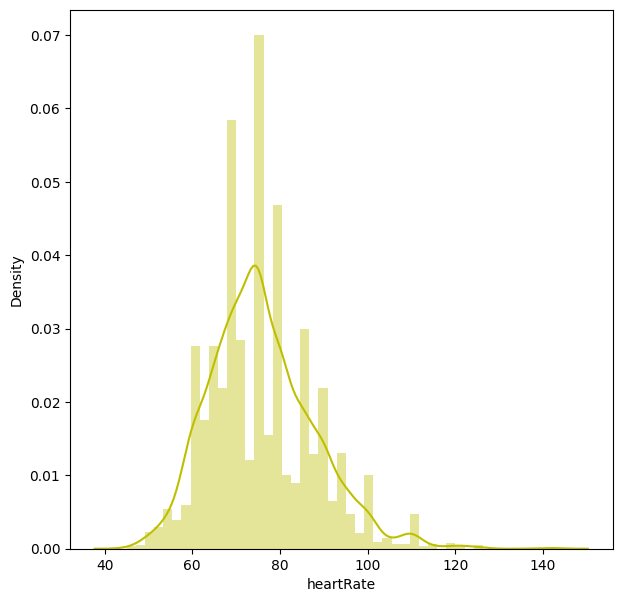

In [36]:
plt.figure(figsize=(7,7))
sns.distplot(dataset1['heartRate'],color='y')

<Axes: xlabel='glucose', ylabel='Density'>

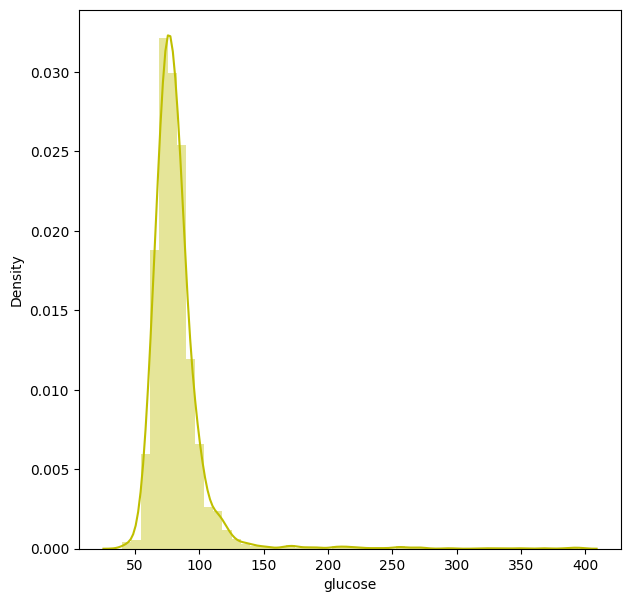

In [38]:
plt.figure(figsize=(7,7))
sns.distplot(dataset1['glucose'],color='y')

In [39]:
dataset1['glucose'] = np.log(dataset1['glucose'])

<Axes: xlabel='glucose', ylabel='Density'>

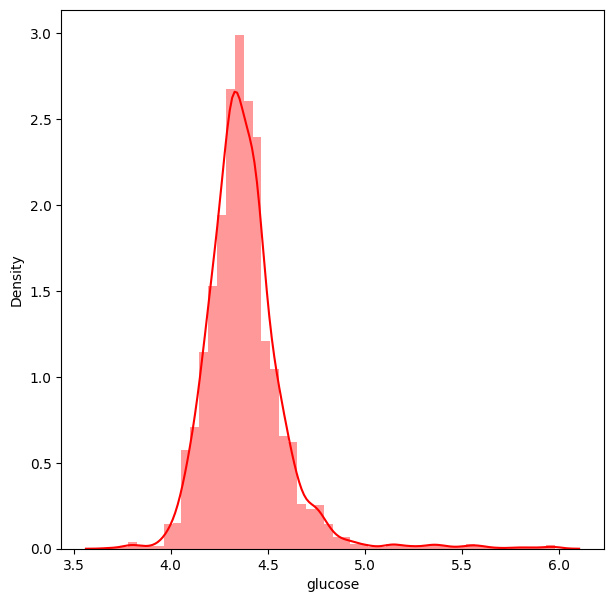

In [40]:
plt.figure(figsize=(7,7))
sns.distplot(dataset1['glucose'],color='r')

In [41]:
dataset1.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,3.393501,72.0,4.317488,0


In [42]:
dataset1['cigsPerDay'].value_counts()

,count
cigsPerDay,
0.0,1480
20.0,538
30.0,158
15.0,147
10.0,88
5.0,87
9.0,81
3.0,68
40.0,53


In [43]:
dataset1.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,3.393501,72.0,4.317488,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,3.013081,88.0,4.543295,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,3.341447,68.0,4.543295,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,3.274121,70.0,4.343805,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,3.490429,85.0,4.174387,1


In [44]:
dataset1['sex'] = dataset1['sex'].apply(lambda x : 0 if x == 'M' else 1)

In [47]:
dataset1['is_smoking'] = dataset1['is_smoking'].apply(lambda x : 0 if x == 'NO' else 1)

In [48]:
dataset1['is_smoking'].value_counts()

,count
is_smoking,
0,1480
1,1447


In [50]:
dataset1[['sex','BMI']]

,sex,BMI
1,0,3.393501
2,1,3.013081
3,0,3.341447
4,1,3.274121
5,1,3.490429
...,...,...
3384,1,3.295096
3385,1,3.376905
3386,1,3.089223
3387,0,3.364533


In [54]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
from scipy.stats import zscore

In [51]:
dataset1.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,3.393501,72.0,4.317488,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,3.013081,88.0,4.543295,0


In [57]:
dataset1['age'] = zscore(dataset1['age'])

In [59]:
dataset1['totChol'] = zscore(dataset1['totChol'])
dataset1['sysBP'] = zscore(dataset1['sysBP'])
dataset1['diaBP'] = zscore(dataset1['diaBP'])
dataset1['heartRate'] = zscore(dataset1['heartRate'])

In [60]:
dataset1.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,-1.571403,4.0,0,0,0.0,0.0,0,1,0,-0.563362,1.584669,1.249815,3.393501,-0.324858,4.317488,0
2,2,-0.408034,1.0,1,1,10.0,0.0,0,0,0,0.288548,-0.744831,-0.985874,3.013081,1.011910,4.543295,0
3,3,0.057314,1.0,0,1,20.0,0.0,0,1,0,-0.092570,1.136688,0.421782,3.341447,-0.659050,4.543295,1
4,4,1.686031,1.0,1,1,30.0,0.0,0,0,0,0.086780,0.173529,0.173372,3.274121,-0.491954,4.343805,0
5,5,1.337020,3.0,1,0,0.0,0.0,0,1,0,0.781759,2.211842,3.154292,3.490429,0.761266,4.174387,1


In [61]:
dataset2 = dataset1.copy()

In [62]:
dataset2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,-1.571403,4.0,0,0,0.0,0.0,0,1,0,-0.563362,1.584669,1.249815,3.393501,-0.324858,4.317488,0
2,2,-0.408034,1.0,1,1,10.0,0.0,0,0,0,0.288548,-0.744831,-0.985874,3.013081,1.011910,4.543295,0
3,3,0.057314,1.0,0,1,20.0,0.0,0,1,0,-0.092570,1.136688,0.421782,3.341447,-0.659050,4.543295,1
4,4,1.686031,1.0,1,1,30.0,0.0,0,0,0,0.086780,0.173529,0.173372,3.274121,-0.491954,4.343805,0
5,5,1.337020,3.0,1,0,0.0,0.0,0,1,0,0.781759,2.211842,3.154292,3.490429,0.761266,4.174387,1


In [63]:
dataset2.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [64]:
X = dataset2[['education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

In [65]:
X.head()

,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,4.0,0,0,0.0,0.0,0,1,0,-0.563362,1.584669,1.249815,3.393501,-0.324858,4.317488
2,1.0,1,1,10.0,0.0,0,0,0,0.288548,-0.744831,-0.985874,3.013081,1.011910,4.543295
3,1.0,0,1,20.0,0.0,0,1,0,-0.092570,1.136688,0.421782,3.341447,-0.659050,4.543295
4,1.0,1,1,30.0,0.0,0,0,0,0.086780,0.173529,0.173372,3.274121,-0.491954,4.343805
5,3.0,1,0,0.0,0.0,0,1,0,0.781759,2.211842,3.154292,3.490429,0.761266,4.174387


In [66]:
y = dataset2['TenYearCHD']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(2341, 14)
(586, 14)


In [68]:
y_train.value_counts()

,count
TenYearCHD,
0,1991
1,350


In [69]:
y_test.value_counts()

,count
TenYearCHD,
0,492
1,94


In [70]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [71]:
clf.coef_

array([[-0.09157211, -0.42161708,  0.05805971,  0.01571095,  0.02961802,
         1.11465926,  0.1354123 ,  0.18437581,  0.20795064,  0.59727771,
        -0.13723149, -0.11345618, -0.10649936,  0.91054164]])

In [72]:
clf.intercept_

array([-5.34156535])

In [73]:
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [74]:
X_test

,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2470,1.0,1,1,3.0,0.0,0,0,0,-0.451269,1.629467,2.326259,3.482470,-0.909695,4.356709
826,2.0,1,1,5.0,0.0,0,0,0,1.633668,-0.184855,-0.075038,3.233173,-0.491954,4.442651
3139,3.0,1,0,0.0,0.0,0,1,0,-1.146248,1.002294,1.581029,3.193763,0.427074,4.317488
2278,4.0,1,0,0.0,0.0,0,0,0,0.064361,-0.991221,-1.399891,3.181797,-0.742598,4.382027
346,1.0,0,1,15.0,0.0,0,0,0,0.781759,-0.229653,-0.282046,3.272227,0.176430,4.189655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,1.0,0,0,0.0,0.0,0,0,0,-0.518525,-0.229653,-0.240645,3.096030,-0.575502,4.430817
3131,2.0,1,0,0.0,0.0,0,0,0,-0.070151,-0.834427,0.173372,3.356200,-0.324858,4.430817
2569,1.0,1,0,0.0,0.0,0,0,0,0.176454,-0.677634,0.587389,3.120160,0.761266,4.564348
1296,4.0,1,1,9.0,0.0,0,0,0,2.351066,-0.207254,-0.985874,3.021400,-1.327435,4.127134


In [75]:
test_preds

array([[0.82063508, 0.17936492],
       [0.86286754, 0.13713246],
       [0.90341434, 0.09658566],
       ...,
       [0.92972361, 0.07027639],
       [0.86681658, 0.13318342],
       [0.88322275, 0.11677725]])

In [76]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [77]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [79]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8556172575822298
The accuracy on test data is  0.841296928327645


[[1977   14]
 [ 324   26]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

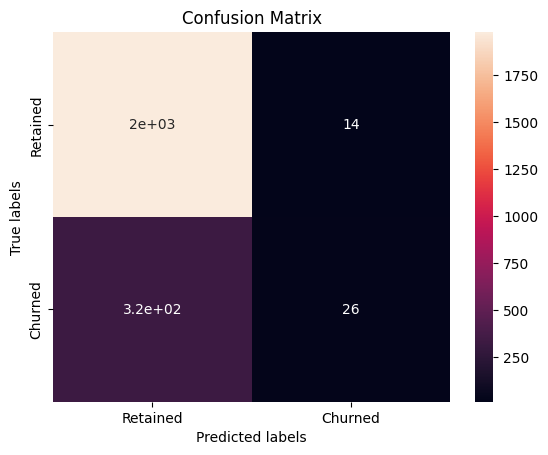

In [80]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[488   4]
 [ 89   5]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

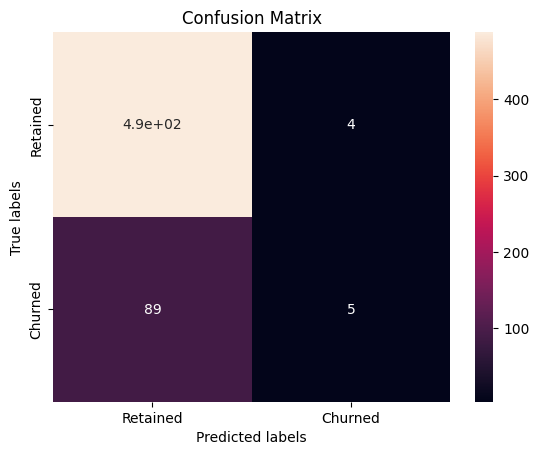

In [81]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [82]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [83]:
logistic = LogisticRegression()

In [84]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.855, test=0.855) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


[CV] END ................ accuracy: (train=0.854, test=0.855) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.855, test=0.859) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.856, test=0.850) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.856, test=0.846) total time=   0.1s


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.5s
